Looks somewhat different. One way to compare the bands would be to do a scatter plot of the values of Band 1 vs Band 6. The problem is that there are too many pixels.

1. Find the total number of pixels in the image using data['B1'].shape, call that number N

2. We will set a sample percentage which we call spercentage as .45% This should be around 4K points.

3. Number of samples we will use will be N*spercentage which should be around 4K points

4. To randomly choose points here is a snipit of code to get random indices:
    samplesInds =range(1,N) 
    np.random.shuffle(samplesInds)
    samplesInds = samplesInds[0:numSamps]
5. Lets call the image b1=data['B1']. Then b1.ravel()[sampleInds] are the values at the sampled pixels. Make a scatter plot of sampled b1 (x-axis) vs b6 (y-axis) where b6 are the corresponding points from Band 6, 'B6'.

6. Title the image "A comparison of Band 1 and Band 6 Reflectance."

7. Title the x-axis Band 1 Reflectance and y Band 6 Reflectance

8. All the dots at this point may look like a big jumble. Set the alpha (transparency) low enough so you can see where the dots are bunching up. 

9. Chose an size (other than default), color, and marker.

One thing we like to do is compare with a linear regression. If the data fits a line then there should be a good corrolation between line fit and the data.

1. Use the polyfit function to fit the B1 samples vs. the B6 samples to get a line fit.

2. Use polyval (on two x values ... one just below the min (90%) and one just above max (110%)) to get a bet fit line.

3. Show the line (plot) in red on top of the samples.

4. Make sure you have a legend that says "Linear regression line"

5. Compute the slope and use matplotlibs "text" function to put a label "slope = " (the slope value) on the graph. You will need to manually adjust the position so it doesn't block other elements.

6. From scipy stats use get the pearson corrlollation coefficient and use the text to put that on the graph.

7. Do the same for Band 7 vs Band 6. Which is more related?

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
#load data from mat file and store in data
#B1,...,B7 represent arrays of different light band data 
data = loadmat('AQUA.2013089.2055.mat')

In [3]:
#printing max, min, and mean of data['B1']
#print('max:',data['B1'].max())
#print('min:',data['B1'].min())
#print('mean:',data['B1'].mean())

In [4]:
#n = total number pixels in image
nrows, ncols = data['B1'].shape
row, col = np.ogrid[:nrows, :ncols]
n = nrows*ncols
print(n)

609638


In [5]:
#0.045% of n
spercentage = 0.0045
numSamps = spercentage*n
print(numSamps)

2743.371


In [6]:
#get random points for sample
samplesInds=range(1,n)
np.random.shuffle(samplesInds)
samplesInds = samplesInds[0:int(numSamps)]
#print(samplesInds)

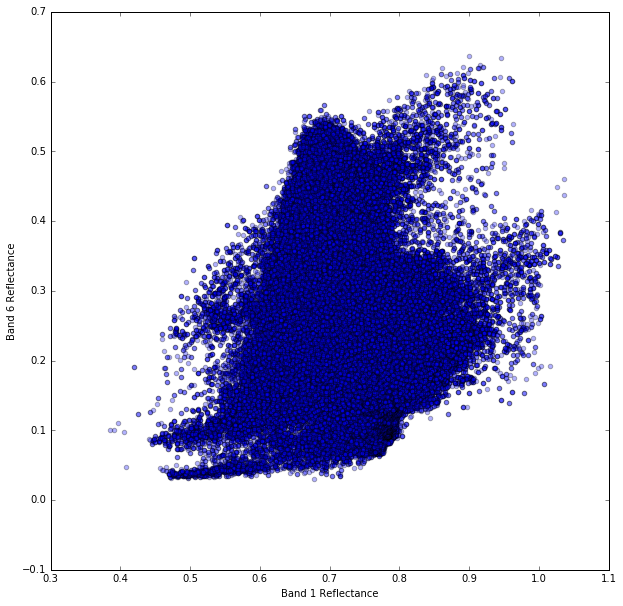

In [7]:
# make scatter plot comparing B1 and B6
b1 = data['B1']
b6 = data['B6']
b1.ravel()[samplesInds] # values at the sampled pixels

fig, ax = plt.subplots(figsize=(10,10))

cmap = plt.get_cmap('Blues')
ax.scatter(b1, b6,marker='o',cmap=cmap,alpha = 0.30)
ax.set_xlabel('Band 1 Reflectance')
ax.set_ylabel('Band 6 Reflectance')


#min sample b1
#b1_s1 = random.choice(b1)
#print(b1_s1)
#max sample b1
#b1_s2 = random.choice(b1)
#print(b1_s2)

#min sample b6
#max sample b6

#m, b = np.polyval(, b6, 1)
#print(m)
#print(b)
